**Import library for ML project**

In [46]:


# Machine learning library and packages

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.grid_search import GridSearchCV
%matplotlib inline

**Read Data**

In [48]:
# Read yelp.csv data
df = pd.read_csv('yelp.csv')

#column name in data
print("Column are: ", df.columns)

# Shape of dataset
print("Shape of dataset: ", df.shape) # (10000, 10). 10k rows and 10 columns

# Initial few row of data
df.head()

Column are:  Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')
Shape of dataset:  (10000, 10)


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,26-01-2011,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,27-07-2011,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,14-06-2012,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,27-05-2010,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,05-01-2012,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [49]:
# From my own understandng they hide business Id, review_id, user_id for privacy reason. And this three features...
#..are not important for us

**Basic EDA(Exploratory data analysis)**

In [50]:
# Checking statistical details like percentile, mean, std etc. of a data frame df (that contains yelp.csv)
print("",df.describe())

# Summary of dataframe
print("Summary of df: ", df.info())

               stars          cool        useful         funny
count  10000.000000  10000.000000  10000.000000  10000.000000
mean       3.777500      0.876800      1.409300      0.701300
std        1.214636      2.067861      2.336647      1.907942
min        1.000000      0.000000      0.000000      0.000000
25%        3.000000      0.000000      0.000000      0.000000
50%        4.000000      0.000000      1.000000      0.000000
75%        5.000000      1.000000      2.000000      1.000000
max        5.000000     77.000000     76.000000     57.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
fun

In [51]:
# Checking length of each review. For that create a new column called "Review Len"
df['Review Len'] = df['text'].apply(len)

# Print initial dataset and we will "Reviw Len" column added as well. Print initial 3 row
df.head(3)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,Review Len
0,9yKzy9PApeiPPOUJEtnvkg,26-01-2011,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,27-07-2011,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,14-06-2012,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76


In [71]:
# Class distribution of rating (in stars)
class_count = df.groupby('stars').size()
print(class_count)

stars
1     749
2     927
3    1461
4    3526
5    3337
dtype: int64
Mean is:  3.7775
Standard Deviation:  1.2146362764746714


In [73]:
# basic statistics - mean, Standard deviation
# mean of rating (stars)
print("Mean is: ", df['stars'].mean())

# standard deviation. 
print("Standard Deviation: ", df['stars'].std())

"""According to Six sigma rule also known as the empirical rule or 68-95-99.7 rule. 
68% of your observations will fall between one standard deviation of the mean. 
95% will fall within two, and 99.7% will fall within three."""

Mean is:  3.7775
Standard Deviation:  1.2146362764746714


'According to Six sigma rule also known as the empirical rule or 68-95-99.7 rule. \n68% of your observations will fall between one standard deviation of the mean. \n95% will fall within two, and 99.7% will fall within three.'

**Visualization**

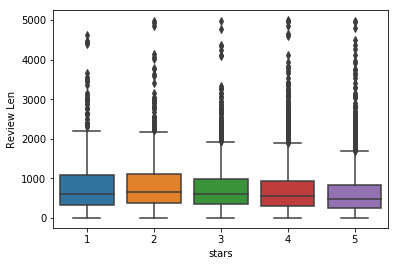

In [53]:
 # Box plot 
sns.boxplot(x='stars', y='Review Len', data=df)


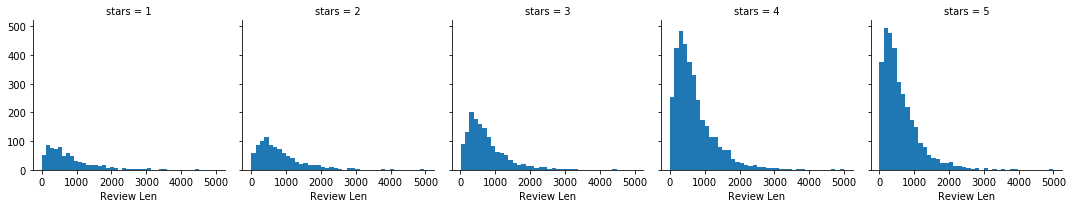

In [54]:
#Visualization will help to know how features values are correlated to each other.

# Relation between review length and star rating. Histogram will be helpful.

Graph = sns.FacetGrid(data=df, col='stars')
Graph.map(plt.hist, 'Review Len', bins=40) # Text length is somewhat similar across all stars.

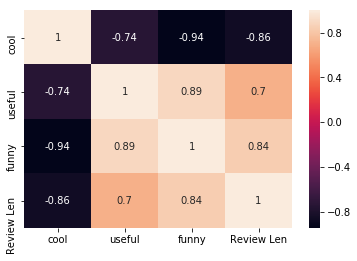

In [55]:
# Now We will find if there's any correlation between useful, funny, and cool. Heatmap are useful for this task.
stars = df.groupby('stars').mean()
stars.corr()

sns.heatmap(data=stars.corr(), annot=True) 

# From heatmap. We can say. There is negative correlation between (cool and useful), (cool and funny), (cool and Review len)
# Positive realtion. (Funny and useful), (Review len & Funny), (Review len & Useful)


4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

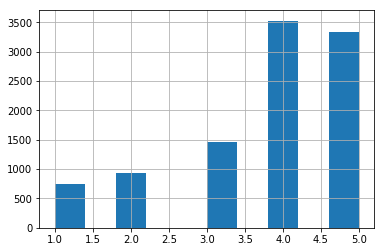

In [56]:
# Total count of stars in dataset 
df['stars'].unique()
df['stars'].hist()

# Total number of count of rating 1, 2, 3, 4 and 5 

df['stars'].value_counts() # Lowest number total count is for  rating 1.

In [57]:
# Select only rating with 1, 3, and 5.

df_class = df[(df['stars']==1) | (df['stars']==3) | (df['stars']==5)]
# df_class = df # accuracy was low with whole dataset
df_class.head()
print("Shape of dataset: ", df_class.shape) # only include row with rating 1, 3, and 5.

print(df_class)

Shape of dataset:  (5547, 11)
                 business_id        date               review_id  stars  \
0     9yKzy9PApeiPPOUJEtnvkg  26-01-2011  fWKvX83p0-ka4JS3dc6E5A      5   
1     ZRJwVLyzEJq1VAihDhYiow  27-07-2011  IjZ33sJrzXqU-0X6U8NwyA      5   
3     _1QQZuf4zZOyFCvXc0o6Vg  27-05-2010  G-WvGaISbqqaMHlNnByodA      5   
4     6ozycU1RpktNG2-1BroVtw  05-01-2012  1uJFq2r5QfJG_6ExMRCaGw      5   
6     zp713qNhx8d9KCJJnrw1xA  12-02-2010  riFQ3vxNpP4rWLk_CSri2A      5   
9     nMHhuYan8e3cONo3PornJA  11-08-2010  jJAIXA46pU1swYyRCdfXtQ      5   
10    AsSCv0q_BWqIe3mX2JqsOQ  16-06-2010  E11jzpKz9Kw5K7fuARWfRw      5   
11    e9nN4XxjdHj4qtKCOPq_vg  21-10-2011  3rPt0LxF7rgmEUrznoH22w      5   
12    h53YuCiIDfEFSJCQpk8v1g  11-01-2010  cGnKNX3I9rthE0-TH24-qA      5   
16    supigcPNO9IKo6olaTNV-g  12-10-2008  HXP_0Ul-FCmA4f-k9CqvaQ      3   
17    O510Re68mOy9dU490JTKCg  03-05-2010  j4SIzrIy0WrmW4yr4--Khg      5   
18    b5cEoKR8iQliq-yT2_O0LQ  06-03-2009  v0cTd3PNpYCkTyGKSpOfGA      

In [58]:
# seperate dataset.  X is input and y is output.
x = df_class['text']
y = df_class['stars']
# print(x.head())
# print(y.head())

**Preprocessing of data**

In [59]:
# library to import stop-word in English
from sklearn.feature_extraction import stop_words
 
# print(stop_words.ENGLISH_STOP_WORDS)

In [60]:
# remove punctuation and stop-word.
import string
def text_preprocess(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    # remove stop-words from text
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [61]:
# Vectorization of text
"""convert review into vector form"""

bow_transformer = CountVectorizer(analyzer=text_preprocess).fit(x)
# len(bow_transformer.vocabulary_)

In [62]:
x = bow_transformer.transform(x)

print('Sparse Matrix Shape: ', x.shape)
print('Amount of Non-Zero occurrences: ', x.nnz)


Sparse Matrix Shape:  (5547, 31335)
Amount of Non-Zero occurrences:  312451


**Training and test. Split dataset into two part- training and testing**

In [63]:
# skleran for splitting dataset
from sklearn.model_selection import train_test_split

# sklearn function to split dataset into train, and test.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)



**Check performance of various Machine learning algorithm**

In [64]:
# Logistic Regression

# import necessary library

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn import linear_model

# Fitting Logistic Regression to the Training set
classifier = linear_model.LogisticRegression(C=1.5)
classifier.fit(x_train, y_train)

# test data - prediction
y_pred = classifier.predict(x_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Calculating Accuracy, Precision 
score_lr = accuracy_score(y_test,y_pred)
print("\n")
print("Accuracy is ", round(score_lr*100, 2),"%")
print("Classification report: ")
print(classification_report(y_test, y_pred))

# calculate recall and precision
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print("Precision: ", precision) # precision = true positive / true positive + false positive
print("recall: ", recall) # recall = True positive / True positive + False Negative

Confusion Matrix:
 [[138  50  55]
 [ 26 273 143]
 [ 20  71 889]]


Accuracy is  78.08 %
Classification report: 
             precision    recall  f1-score   support

          1       0.75      0.57      0.65       243
          3       0.69      0.62      0.65       442
          5       0.82      0.91      0.86       980

avg / total       0.77      0.78      0.77      1665

Precision:  0.7807807807807807
recall:  0.7807807807807807


In [65]:
# Using MNB(Multinomial Naive Bayes)
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)
print("Confusion Matrix for MNB:")
print(confusion_matrix(y_test,predmnb))
print("Score:", round(accuracy_score(y_test,predmnb)*100,2))
print("C", classification_report(y_test, predmnb))


# calculate recall and precision
precision = precision_score(y_test, predmnb, average='micro')
recall = recall_score(y_test, predmnb, average='micro')

print("Precision: ", precision) # precision = true positive / true positive + false positive
print("recall: ", recall) # recall = True positive / True positive + False Negative

Confusion Matrix for MNB:
[[ 92  85  66]
 [ 10 233 199]
 [ 11  58 911]]
Score: 74.23
C              precision    recall  f1-score   support

          1       0.81      0.38      0.52       243
          3       0.62      0.53      0.57       442
          5       0.77      0.93      0.85       980

avg / total       0.74      0.74      0.72      1665

Precision:  0.7423423423423423
recall:  0.7423423423423423


In [66]:
# Knn. K nearest neighbour

# import library for accuracy, recall and precision
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# K Nearest Neighbour Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

# prediction on test data
pr_knn = knn.predict(x_test)
print("K neighbor confusion matrix:")
print(confusion_matrix(y_test, pr_knn))
print("Score: ", round(accuracy_score(y_test, pr_knn)*100,2))
print("Classification:")
print(classification_report(y_test, pr_knn))

# accuracy
score = accuracy_score(y_test, pr_knn)
print("\n")
print("Accuracy is ", round(score*100, 2),"%")

# calculate recall and precision
precision = precision_score(y_test, pr_knn, average='micro')
recall = recall_score(y_test, pr_knn, average='micro')

print("Precision: ", precision) # precision = true positive / true positive + false positive
print("recall: ", recall) # recall = True positive / True positive + False Negative

K neighbor confusion matrix:
[[ 21  11 211]
 [ 17  34 391]
 [ 15  10 955]]
Score:  60.66
Classification:
             precision    recall  f1-score   support

          1       0.40      0.09      0.14       243
          3       0.62      0.08      0.14       442
          5       0.61      0.97      0.75       980

avg / total       0.58      0.61      0.50      1665



Accuracy is  60.66 %
Precision:  0.6066066066066066
recall:  0.6066066066066066


In [67]:
# # MULTILAYER PERCEPTRON CLASSIFIER
# import MLP library from sklearn
from sklearn.neural_network import MLPClassifier
# import library for f1-score
from sklearn.metrics import f1_score

mlp = MLPClassifier()
mlp.fit(x_train, y_train)

# predict on test data
pr_mlp = mlp.predict(x_test)
print("Confusion Matrix:")
# create confusion matrix which is true positive, true negative, false positive, false negative 
print(confusion_matrix(y_test, pr_mlp))
score = round(accuracy_score(y_test,pr_mlp)*100,2)
print("Score is: ", score)
print("Classification Report:")
print(classification_report(y_test, pr_mlp))

# calculate recall and precision
precision = precision_score(y_test, pr_mlp, average='micro')
recall = recall_score(y_test, pr_mlp, average='micro')

print("Precision: ", precision) # precision = true positive / true positive + false positive
print("recall: ", recall) # recall = True positive / True positive + False Negative

Confusion Matrix:
[[141  55  47]
 [ 28 281 133]
 [ 18  79 883]]
Score is:  78.38
Classification Report:
             precision    recall  f1-score   support

          1       0.75      0.58      0.66       243
          3       0.68      0.64      0.66       442
          5       0.83      0.90      0.86       980

avg / total       0.78      0.78      0.78      1665

Precision:  0.7837837837837838
recall:  0.7837837837837838


**Check ML model**

##Performance of Machine learning algorithm
###1) Logistic Regression:
    Accuracy - 78.08
    Precision - 0.78
###2) Multinomial Naive Bayes (MNB)
    Accuracy - 74.23
    Precision - 0.74
###3) K nearest Neighbour Algorithn
    Accuracy - 60.66
    Precision - 0.60
###4) Multilayer Perceptron Classifier
    Accuracy - 78.38
    Precision - 0.78

In [68]:
# POSITIVE REVIEW
pr = df['text'][0]
print(pr[:100])
print("Actual Rating: ", df['stars'][0])
pr_t = bow_transformer.transform([pr])
print("Predicted Rating: ", mlp.predict(pr_t)[0])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect whi
Actual Rating:  5
Predicted Rating:  5


NOTE: MLflow integrated in python script of this notebook